In [1]:
from imblearn.under_sampling import RandomUnderSampler
us = RandomUnderSampler(random_state=0)

In [2]:
# 进行随机下采样，并使用MLP分类
import scipy
import scipy.io as scio
import numpy as np
import os
# 读取训练和测试数据
data_root = '/data/file/classification_data/years/sum_2016/'
train_sumX_2016_norm = scio.loadmat(os.path.join(data_root, 'train_sumX_2016_norm.mat'))['X']
train_sumy_2016_label = scio.loadmat(os.path.join(data_root, 'train_sumy_2016_label.mat'))['y']

test_sumX_2016_norm = scio.loadmat(os.path.join(data_root, 'test_sumX_2016_norm.mat'))['X']
test_sumy_2016_label = scio.loadmat(os.path.join(data_root, 'test_sumy_2016_label.mat'))['y']


In [3]:
X_re, y_re = us.fit_resample(train_sumX_2016_norm, train_sumy_2016_label)
X_re
y_re = y_re.reshape(-1, 1)


In [4]:
from sklearn.metrics import balanced_accuracy_score

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_re, y_re)

/home/roczhang/anaconda3/envs/dataAna/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=2, random_state=0)

In [6]:
y_pred =  clf.predict(test_sumX_2016_norm)

In [7]:
clf.score(test_sumX_2016_norm, test_sumy_2016_label)

0.6517857142857143

In [8]:
balanced_accuracy_score(y_pred, test_sumy_2016_label)

0.6671935370565507

In [9]:
def get_roc(pos_prob,y_true):

    pos = y_true[y_true==1]  # 145
    neg = y_true[y_true==0]  # 855
    # [::-1]逆序切片
    threshold = np.sort(pos_prob)[::-1]  # 按预测为正的概率大小逆序排列
    y = y_true[pos_prob.argsort()[::-1]]

    tpr_all = [0] ; fpr_all = [0]
    tpr = 0 ; fpr = 0
    x_step = 1/float(len(neg))  # 0.0011695906432748538
    y_step = 1/float(len(pos))  # 0.006896551724137931
    y_sum = 0
    for i in range(len(threshold)):  # 1000
        if y[i] == 1:
            tpr += y_step
            tpr_all.append(tpr)
            fpr_all.append(fpr)
        else:
            fpr += x_step
            fpr_all.append(fpr)
            tpr_all.append(tpr)
            y_sum += tpr             # fpr加一个样本，y_sum累计。计算面积
    return tpr_all,fpr_all,y_sum*x_step  # 获得总体TPR，FPR和相应的AUC

In [14]:
pos_prob = clf.predict_proba(test_sumX_2016_norm)[:, 1]

In [15]:
pos_prob

array([0.24829647, 0.27531862, 0.36242461, 0.23692475, 0.27355147,
       0.19731686, 0.26471466, 0.13829496, 0.24919065, 0.47853042,
       0.21235239, 0.16597227, 0.26831395, 0.37395543, 0.16011107,
       0.26549703, 0.15983582, 0.31872272, 0.17997182, 0.26253639,
       0.3599728 , 0.19964532, 0.57321332, 0.47059566, 0.22493694,
       0.25608125, 0.15550751, 0.66243528, 0.20728334, 0.26519566,
       0.15581715, 0.63977443, 0.30068959, 0.63664618, 0.15525145,
       0.26244584, 0.15010885, 0.68497602, 0.63390333, 0.63016233,
       0.30566938, 0.50123616, 0.36640599, 0.27991593, 0.27388524,
       0.24329345, 0.19804258, 0.15516937, 0.16722626, 0.2621318 ,
       0.81484824, 0.13829496, 0.781642  , 0.42266217, 0.20852894,
       0.69167832, 0.70957023, 0.18115541, 0.63206224, 0.63880084,
       0.35467383, 0.78601126, 0.48793516, 0.38200762, 0.74750963,
       0.4534643 , 0.81708473, 0.42947329, 0.44050806, 0.8041525 ,
       0.70357969, 0.50980786, 0.29275422, 0.40313985, 0.54311

In [16]:
tpr, fpr, auc = get_roc(pos_prob, test_sumy_2016_label)

In [19]:
auc

0.7659438775510214

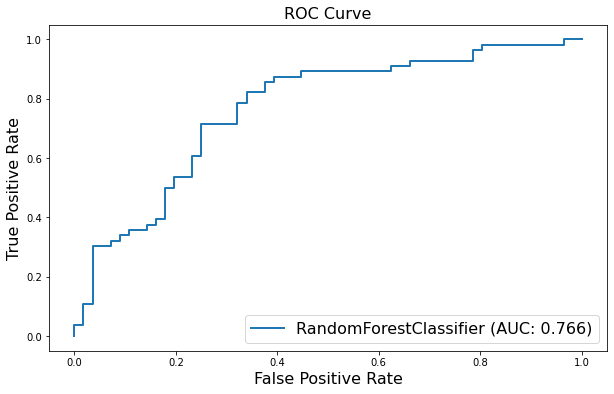

In [18]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="RandomForestClassifier (AUC: {:.3f})".format(auc),linewidth=2)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=16)
plt.show()